<a href="https://colab.research.google.com/github/toruuno/report_ml/blob/master/np_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k平均クラスタリング(k-means)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成

In [2]:
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

(300, 2)


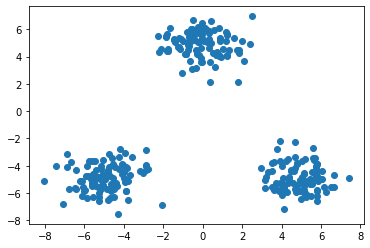

In [3]:
#データ作成
X_train = gen_data()
print(X_train.shape)
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

## 学習

k-meansアルゴリズムは以下のとおりである

1) 各クラスタ中心の初期値を設定する

2) 各データ点に対して、各クラスタ中心との距離を計算し、最も距離が近いクラスタを割り当てる

3) 各クラスタの平均ベクトル（中心）を計算する

4) 収束するまで2, 3の処理を繰り返す

In [4]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3
iter_max = 100

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

## クラスタリング結果

In [5]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')

In [6]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

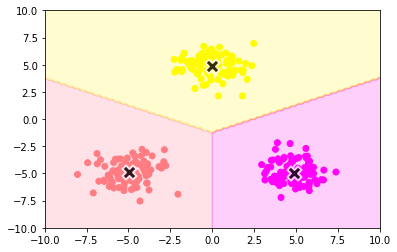

In [7]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

## numpy実装

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [9]:
print("labels: {}".format(kmeans.labels_))
print("cluster_centers: {}".format(kmeans.cluster_centers_))
kmeans.cluster_centers_

labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
cluster_centers: [[-0.0296632   4.90883505]
 [-4.94798961 -4.89214625]
 [ 4.90389827 -4.91762971]]


array([[-0.0296632 ,  4.90883505],
       [-4.94798961, -4.89214625],
       [ 4.90389827, -4.91762971]])

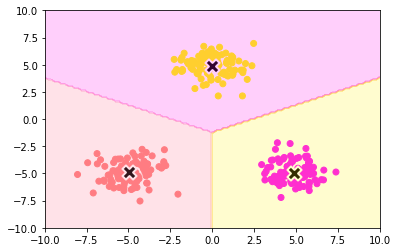

In [10]:
plt_result(X_train, kmeans.cluster_centers_, xx)

### (実習)k-means++を実装して動かしてみる

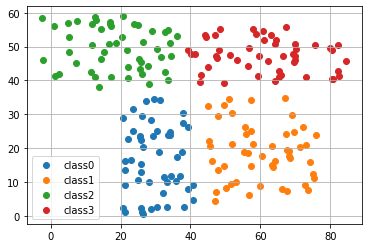

In [11]:
import random

#データ生成
#何となくk=4にて上手く収まるのかを試す
csize=4
dsize = 50
random.seed(57)
data = np.zeros(csize*dsize*2).reshape(csize,2,dsize)

offsetX = [30,60,17,60]
offsetY = [17,19,48,47]
wvalX = [10,15,20,24]
wvalY = [17,15,10,8]
for c in range(csize):
  for i in range(dsize):
    data[c][0][i] = random.randint(offsetX[c]-wvalX[c],offsetX[c]+wvalX[c]) + random.random()
    data[c][1][i] = random.randint(offsetY[c]-wvalY[c],offsetY[c]+wvalY[c]) + random.random()

plt.grid()

for c in range(csize):
  plt.scatter(data[c][0],data[c][1],label="class"+str(c))

plt.legend()

In [12]:
#データをマージする
X_data = np.zeros(csize*dsize*2).reshape(csize*dsize,2)
for c in range(csize):
  for i in range(dsize):
    X_data[(c*dsize)+i][0] = data[c][0][i]
    X_data[(c*dsize)+i][1] = data[c][1][i]


In [13]:
import random
def kMeans_pp(i_max=100, X_t=None, seed_=0):

  #初期クラスタポイントをランダム選定(k=4)
  random.seed(seed_)
  cList=[random.randint(0,dsize*4)]

  for i in range(1,4,1):
    #Class毎に距離を管理
    dList=[]
    for p in range(len(cList)): dList.append({})

    #確定済Classについて距離を計算
    for j in range(dsize*csize):

      #すでにクラスタ初期値採用済は外す
      if j in cList: continue 
      
      #距離計算
      for p in range(len(cList)):
        #距離をkeyとして位置を管理(距離が重複した場合は上書きになる)
        key = ((X_data[j][0]-X_data[cList[p]][0])**2)+((X_data[j][1]-X_data[cList[p]][1])**2)
        dList[p][key]=j

    #最長距離を検出
    dists = {}
    for p in range(len(dList)):
      for key in dList[p].keys():
        dists[key] = p

    kc = sorted(dists.items(),reverse=True)[0]
    cList.append(dList[kc[1]][kc[0]])

  #確定した初期位置よりクラスタを割り当てなおし
  #クラスタ中心を再計算してk-means法を実行する
  centers_=np.array([
                    [X_data[cList[0]][0],X_data[cList[0]][1]],
                    [X_data[cList[1]][0],X_data[cList[1]][1]],
                    [X_data[cList[2]][0],X_data[cList[2]][1]],
                    [X_data[cList[3]][0],X_data[cList[3]][1]],
                    ])

  n_c = len(centers_)
  for _ in range(i_max):
      prev_centers = np.copy(centers_)
      D = np.zeros((len(X_t), n_c))
      # 各データ点に対して、各クラスタ中心との距離を計算
      for i, x in enumerate(X_t):
          D[i] = distance(x, centers_)
      # 各データ点に、最も距離が近いクラスタを割り当
      cluster_index = np.argmin(D, axis=1)
      # 各クラスタの中心を計算
      for k in range(n_c):
          index_k = cluster_index == k
          centers_[k] = np.mean(X_t[index_k], axis=0)
      # 収束判定
      if np.allclose(prev_centers, centers_):
          break
    
  return centers_, cList

[60, 107, 84, 89]
[[31.58937657 15.95611794]
 [19.80769019 48.92428909]
 [62.67447846 17.5486146 ]
 [61.88543785 46.23426712]]


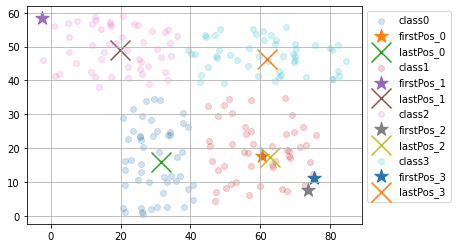

In [14]:
#k-means++法(収束するまで)
centers_, initialCList=kMeans_pp(i_max=100, X_t=X_data, seed_=4)
print(initialCList)
print(centers_)

#確定したクラスタを見てみる(成功例、だいたい成功する)
#初期クラスタと確定クラスタの比較
plt.grid()
for c in range(csize):
  plt.scatter(data[c][0],data[c][1],label="class"+str(c),alpha=0.2)
  plt.scatter(X_data[initialCList[c]][0],X_data[initialCList[c]][1],marker='*',label='firstPos_' + str(c), s=200)
  plt.scatter(centers_[c][0],centers_[c][1],marker='x',label='lastPos_' + str(c), s=400)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

[146, 84, 107, 89]
[[37.69345698 45.0448553 ]
 [33.51306122 14.2068376 ]
 [12.75257996 50.64141799]
 [66.53521726 32.80113838]]


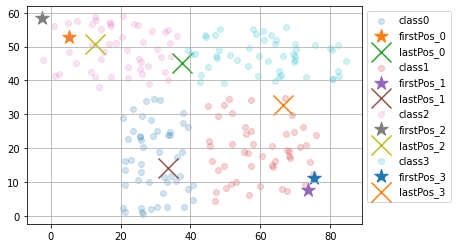

In [15]:
#k-means++法(収束するまで)
centers_, initialCList=kMeans_pp(i_max=100, X_t=X_data, seed_=10)
print(initialCList)
print(centers_)

#確定したクラスタを見てみる(失敗例、初期値によっては極稀に失敗する様子)
#初期クラスタと確定クラスタの比較
plt.grid()
for c in range(csize):
  plt.scatter(data[c][0],data[c][1],label="class"+str(c),alpha=0.2)
  plt.scatter(X_data[initialCList[c]][0],X_data[initialCList[c]][1],marker='*',label='firstPos_' + str(c), s=200)
  plt.scatter(centers_[c][0],centers_[c][1],marker='x',label='lastPos_' + str(c), s=400)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')